# Regresión lineal múltiple
#### Estadística 2
##### Por: Jorge Iván Reyes Hernández

Recordemos que uno de los objetivos del análisis de regresión es __describir y explicar relaciones entre variable__. En la regresión simple buscamos explicar una variable (generalmente denotada por $Y$) a través de una única variable independiente o regresora (generalmente denotada por $X$). En la regresión múltiple buscamos explicar una variable, $Y$ a través de múltiples regresores, $X_1, \ldots, X_k$.

En general, el modelo de regresión es
$$
Y = f(X_1,\ldots,X_k) + \epsilon
$$

## 1. Formulación del modelo

El primer paso en el análisis de regresíon es la formulación del modelo. 
Aquí debemos:
1. Seleccionar las variables ($X_1,\ldots,X_k$).

    Debe haber un balance entre la simplicidad del modelo (forma de la $f$) y la complejidad (qué tantas variables usar).
    
2. Especificar la forma funcional del modelo ($f$).
    
    En regresión lineal, $f$ es una función lineal (de los parámetros):
    
    $$
    Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_k X_k
    $$
    
3. Hacer suposiciones acerca del error aleatorio ($\epsilon$).

    $$
        \epsilon \sim \mathcal{N}(0,\sigma^{2})
    $$
    

Para ilustrar lo anterior, considere los siguientes datos.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
data = pd.read_csv("data_sales.csv")

In [74]:
data

,Periodo (por 3 meses),Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
0,1,2596,203,1.42,150
1,2,2709,216,1.41,120
2,3,2552,207,1.95,146
3,4,3004,250,1.99,270
4,5,3076,240,1.63,200
5,6,2513,226,1.82,93
6,7,2626,246,1.69,70
7,8,3120,250,1.65,230
8,9,2751,235,1.99,166
9,10,2965,256,1.53,116


Intuitivamente podemos pensar que mientras más se invierta en publicidad, mayores serán las ventas. Si $Y$ indica las ventas, entonces podríamos interesarnos por explicar cómo varían las ventas esperadas conforme varía el gasto en publicidad.

$$
    \mathbb{E}(Y|X) = f(X_1)
$$

Si asumimos que $f(X_1) = \beta_0 + \beta_1 X_1$, obtenemos el modelo de regresión lineal simple.

In [75]:
Y = data["Ventas (en miles de unidades)"]

In [76]:
X_1 = data["Publicidad (en miles de euros)"]

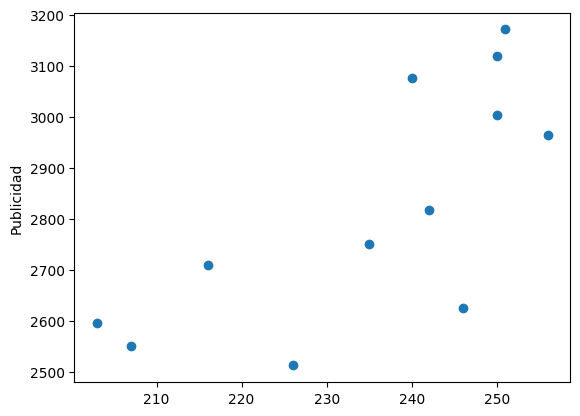

In [77]:
plt.ylabel("Ventas")
plt.ylabel("Publicidad")
plt.scatter(X_1, Y);

In [78]:
# Pearson correlation coefficient and p-value for testing non-correlation.

stats.pearsonr(X_1, Y)

PearsonRResult(statistic=0.7424104360176366, pvalue=0.005685256582679216)

El coeficiente de correlación de Pearson confirma que exite asociación lineal entre las ventas ($Y$) y la publicidad ($X_1$).

### 2. Estimación de la función de regresión

Como hay correlación entre las variables, tiene sentido ajustar un modelo de regresión lineal.

In [79]:
results_1 = sm.OLS(Y, sm.add_constant(X_1)).fit()

In [80]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.551
Model:                                       OLS   Adj. R-squared:                  0.506
Method:                            Least Squares   F-statistic:                     12.28
Date:                           Tue, 25 Apr 2023   Prob (F-statistic):            0.00569
Time:                                   23:29:04   Log-Likelihood:                -77.182
No. Observations:                             12   AIC:                             158.4
Df Residuals:                                 10   BIC:                             159.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            560.4884    647.974      0.865      0.407    -883.289    2004.265
Publicidad (en miles de euros)     9.6297      2.748      3.504      0.006       3.507      15.753
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.650
Skew:                          -0.489   Prob(JB):                        0.722
Kurtosis:                       2.414   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Del resumen anterior podemos notar que
$$
    \hat{Y} = 560.49 + 9.63 X_1
$$

La interpretación del coeficiente asociado a $X_1$ (la publicidad) es que si incrementamos en una unidad $X_1$ (i.e, en un euro el gasto en publicidad), entonces se espera que las ventas aumenten en $9.63$ unidades.

---
__Correlación vs regresión__

Una pregunta natural es: si ya vimos que las ventas ($Y$) y la publicidad ($X_1$) están asociados linealmente (pues el coeficiente de correlación de Pearson es aprox. 0.7), ¿por qué hacer una regresión lineal?

- La correlación (de Pearson) y la regresión son usadas para medir qué tanta relación existe entre variables.
- En análisis de regresión mide el efecto que tiene una variable independiente ($X_i$) en la variable dependiente ($Y$), la correlación no.
- Con el análisis de regresión es posible realizar predicciones.
- En el análisis de regresión se distinguen entre variables dependientes e independientes, $Y$ y $X$, el coeficiente de correlación de Pearson no (pues es simétrico, $r_{XY} = r_{YX}$).
- En el análisis de regresión, la relación causal tiene una dirección:
$$
X \to Y\\
\text{Causa} \to \text{Efecto}
$$
- Correlación no necesariamente implica causalidad.

---

Una forma de comparar modelos es a través de la suma de los errores al cuadrado 

$$
SSR = \sum_i (y_i - \hat{y}_i)^{2}
$$

Un modelo con menor $SSR$ (comparado con otro) explica mayor variabilidad en $Y$ usando $X_i$.


In [81]:
sum(results_1.resid ** 2)

271216.5389327144

Para este modelo $SSR = 271,216$.

Podemos considerar otros modelos usando otra variable regresora para explicar la variabilidad en las ventas.

In [82]:
X_2 = data["Precio (euros por unidad)"]
X_3 = data["Difusión (en miles de euros)"]

In [83]:
results_2 = sm.OLS(Y, sm.add_constant(X_2)).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.098
Method:                            Least Squares   F-statistic:                   0.02267
Date:                           Tue, 25 Apr 2023   Prob (F-statistic):              0.883
Time:                                   23:29:10   Log-Likelihood:                -81.975
No. Observations:                             12   AIC:                             167.9
Df Residuals:                                 10   BIC:                             168.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2919.8312    633.314      4.610      0.001    1508.719    4330.943
Precio (euros por unidad)   -55.4892    368.571     -0.151      0.883    -876.717     765.738
==============================================================================
Omnibus:                        3.551   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.144
Skew:                           0.146   Prob(JB):                        0.564
Kurtosis:                       1.516   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
results_3 = sm.OLS(Y, sm.add_constant(X_3)).fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.509
Model:                                       OLS   Adj. R-squared:                  0.460
Method:                            Least Squares   F-statistic:                     10.36
Date:                           Tue, 25 Apr 2023   Prob (F-statistic):            0.00920
Time:                                   23:29:12   Log-Likelihood:                -77.724
No. Observations:                             12   AIC:                             159.4
Df Residuals:                                 10   BIC:                             160.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2400.0668    141.124     17.007      0.000    2085.623    2714.511
Difusión (en miles de euros)     2.7172      0.844      3.218      0.009       0.836       4.599
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.891
Skew:                          -0.041   Prob(JB):                        0.641
Kurtosis:                       1.668   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De donde

$$
    \hat{Y} = 560 + 9.63 X_1 \\
    \hat{Y} = 2920 - 55.5 X_2 \\
    \hat{Y} = 2400 + 2.72 X_3
$$

con $X_1$: publicidad, $X_2$: precio, $X_3$: difusión.

El problema con hacer esto es que, dados los valores de los regresores, cada ecuación da un valor distinto para las ventas estimadas. ¿A cuál le hacemos caso?

La solución es considerar las variables de manera simultánea dentro del modelo (i.e hacer regresión múltiple).

Como en el caso simple, el primer paso es calcular la matriz de correlación.

In [85]:
X = np.asmatrix((Y, X_1, X_2, X_3))
X

matrix([[2.596e+03, 2.709e+03, 2.552e+03, 3.004e+03, 3.076e+03,
         2.513e+03, 2.626e+03, 3.120e+03, 2.751e+03, 2.965e+03,
         2.818e+03, 3.171e+03],
        [2.030e+02, 2.160e+02, 2.070e+02, 2.500e+02, 2.400e+02,
         2.260e+02, 2.460e+02, 2.500e+02, 2.350e+02, 2.560e+02,
         2.420e+02, 2.510e+02],
        [1.420e+00, 1.410e+00, 1.950e+00, 1.990e+00, 1.630e+00,
         1.820e+00, 1.690e+00, 1.650e+00, 1.990e+00, 1.530e+00,
         1.690e+00, 1.720e+00],
        [1.500e+02, 1.200e+02, 1.460e+02, 2.700e+02, 2.000e+02,
         9.300e+01, 7.000e+01, 2.300e+02, 1.660e+02, 1.160e+02,
         1.000e+02, 2.160e+02]])

In [86]:
# Matrix de correlación
np.corrcoef(X)

array([[ 1.        ,  0.74241044, -0.04755495,  0.71326977],
       [ 0.74241044,  1.        ,  0.15516273,  0.28981203],
       [-0.04755495,  0.15516273,  1.        ,  0.29882096],
       [ 0.71326977,  0.28981203,  0.29882096,  1.        ]])

Por como construimos $X$, las columnas y renglones son: Ventas, Publicidad, Precio, Difusión.

De lo anterior podemos notar que:

1. La correación entre las ventas y la publicidad es (aprox) $0.74$.
2. La correación entre las ventas y el precio es (aprox) $-0.048$.
2. La correación entre las ventas y la difusión es (aprox) $0.713$.


Con la información anterior podríamos, por ejemplo, ajustar un modelo considerando las ventas $Y$, la publicidad $X_1$ y el precio $X_2$, o cualquier conbinación de las 3 co-variables.

In [87]:
X_1, X_2

(0     203
 1     216
 2     207
 3     250
 4     240
 5     226
 6     246
 7     250
 8     235
 9     256
 10    242
 11    251
 Name: Publicidad (en miles de euros), dtype: int64,
 0     1.42
 1     1.41
 2     1.95
 3     1.99
 4     1.63
 5     1.82
 6     1.69
 7     1.65
 8     1.99
 9     1.53
 10    1.69
 11    1.72
 Name: Precio (euros por unidad), dtype: float64)

In [88]:
X_12 = np.asmatrix([X_1, X_2]).T
X_12.shape

(12, 2)

In [96]:
results_4 = sm.GLS(Y, sm.add_constant(X_12)).fit()
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.578
Model:                                       GLS   Adj. R-squared:                  0.485
Method:                            Least Squares   F-statistic:                     6.171
Date:                           Tue, 25 Apr 2023   Prob (F-statistic):             0.0205
Time:                                   23:41:08   Log-Likelihood:                -76.808
No. Observations:                             12   AIC:                             159.6
Df Residuals:                                  9   BIC:                             161.1
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        813.8182    741.014      1.098      0.301    -862.471    2490.108
x1             9.9654      2.842      3.506      0.007       3.536      16.395
x2          -194.5880    255.669     -0.761      0.466    -772.951     383.775
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.819
Skew:                          -0.605   Prob(JB):                        0.664
Kurtosis:                       2.581   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De donde obtenemos que

$$
\hat{Y} = 814 + 9.97 X_1 - 194.6 X_2
$$

1. El modelo ya no es una recta, es un plano.
2. Que el coeficiente de $X_2$ (el precio) sea negativo refleja el hecho de que si el precio aumenta, las ventas (pueden) disminuyen.
3. La magnitud de los coeficientes no está relacionada con la importancia de esa variable al explicar $Y$.

Para poder comparar los coeficientes primero hay que estandarizarlos.

$$\beta^{st}_j = \beta_j \frac{s_{x_j}}{s_y}$$

donde $s$ indica desviación estándar.

In [92]:
s_x1 = X_1.std()
s_x1

18.069730255738506

In [93]:
s_x2 = X_2.std()
s_x2

0.20086743706416746

In [94]:
s_y = Y.std()
s_y

234.3809867922246

Los coeficientes estandarizados son

$$
\beta_1^{st} = (9.97) \frac{18.07}{234.38} = 0.768 \\
\beta_2^{st} = (-194.6) \frac{0.201}{234.38} = -0.167 \\
$$

- Los beta's estandarizados son usados como una medida de la importancia de la variables.
- Los beta's estandarizados son los coeficientes de la regresión al ajustar el modelo con las variables estandarizadas.

Podemos observar que la publicidad es más importante, i.e, tiene mayor influencia (al explicar la variabilidad en las ventas) que el precio del producto.

In [98]:
# SSR con publicidad y precio.
sum(results_4.resid ** 2)

254815.93272616263

Ahora vamos a ajustar el modelo usando las 3 variables explicativas que tenemos.

In [95]:
X_123 = np.asmatrix([X_1, X_2, X_3]).T
X_123.shape

(12, 3)

In [97]:
results_5 = sm.GLS(Y, sm.add_constant(X_123)).fit()
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.922
Model:                                       GLS   Adj. R-squared:                  0.893
Method:                            Least Squares   F-statistic:                     31.50
Date:                           Tue, 25 Apr 2023   Prob (F-statistic):           8.84e-05
Time:                                   23:41:21   Log-Likelihood:                -66.686
No. Observations:                             12   AIC:                             141.4
Df Residuals:                                  8   BIC:                             143.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.2760    345.981      3.608      0.007     450.443    2046.109
x1             7.9081      1.342      5.891      0.000       4.812      11.004
x2          -387.5722    121.116     -3.200      0.013    -666.867    -108.277
x3             2.4222      0.408      5.935      0.000       1.481       3.363
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                0.898
Skew:                          -0.160   Prob(JB):                        0.638
Kurtosis:                       1.698   Cond. No.                     4.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos ver que

$$
\hat{Y} = 1248 + 7.91 X_1 + -387-6 X_2 + 2.42 X_3
$$

Para medir la importancia de las variables sobre $Y$ hay que calcular las beta's estandarizadas.

$$
\beta_1^{st} = 0.610\\
\beta_2^{st} = -0.332\\
\beta_3^{st} = 0.636
$$

In [99]:
# SSR con todas las variables
sum(results_5.resid ** 2)

47166.36496770067

Podemos observar que al incluir más variables $SSR$ disminuye:

1. Usando publicidad: $SST=271,216.53$ 
2. Usando publicidad y precio: $SST = 254,815.93$
3. Usando publicidad, precio y difusión: $SST = 47,166.36$.

Como el $SST$ nos ayuda a comparar modelos, podemos concluir que el tercer modelo explica mejor la variabilidad de las ventas.

## 3. Verificación de la regresión

1. Error estándar de la regresión.
2. Coeficiente de determinación.
3. Estadística $F$ y su $p_{\text{val}}$.
4. Coeficiente de determinación ajustado.

## 4. Verificación de los coeficientes de la regresión

## 5. Verificación de los supuestos